# Homework 2: Line Detection

## Problem 1: Preprocessing

### Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from util import ops
from util.keypoint_detection import HessianDetector

### Load Image Data

In [2]:
original_image = ops.load_image("./original-images/road.png")

Dimensions of ./original-images/road.png: 407 x 548


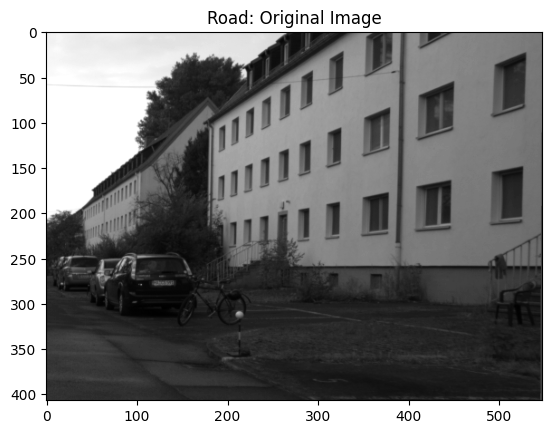

In [3]:
plt.title("Road: Original Image")
plt.imshow(original_image, cmap="gray")
plt.show()

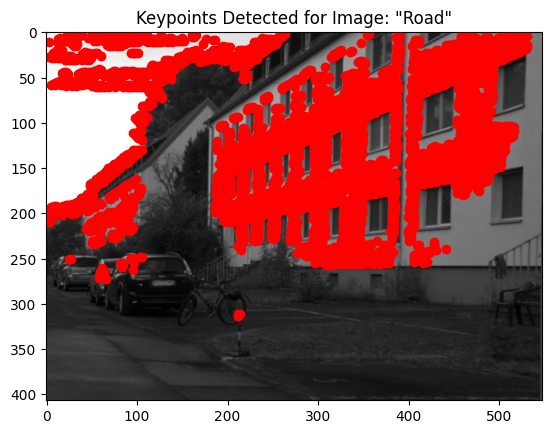

In [4]:
HessianDetector.find_keypoints_and_visualize(
    np.array(original_image), 
    "Road",
    percentile=68.05  # note: I had to run the code several times to arrive at this value
)

## Problem 2: RANSAC

In [3]:
from util.model_fitting import RANSACDetector

In [4]:
np.random.seed(42)

In [5]:
# test
keypoint_detector = HessianDetector()
keypoints = keypoint_detector.find_keypoints(
    np.array(original_image), percentile=68.05
)

assert keypoints.shape[0] == 2

In [6]:
ransac = RANSACDetector()

In [7]:
top_4_models, num_iterations = ransac.fit(
    keypoints
)

/Users/zainraza/Downloads/dev/courses/Stevens/CS-558/Line-Detection/util/model_fitting.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  m = (point2[0] - point1[0]) / (point2[1] - point1[1])
/Users/zainraza/Downloads/dev/courses/Stevens/CS-558/Line-Detection/util/model_fitting.py:63: RuntimeWarning: invalid value encountered in scalar add
  numerator = abs(a * x_coord + b * y_coord + c)


In [8]:
num_iterations

1455.1280329119445

In [16]:
top_4_models[3][0].shape

(284, 2)